In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




In [56]:
file_path = r"D:\ML\Projects-20240722T093004Z-001\Projects\vehicle_price_prediction\Vehicle Price Prediction\dataset.csv"
vehical_data = pd.read_csv(file_path)   
vehical_data.head()  # Display the first few rows of the dataset

df = pd.DataFrame(vehical_data)


In [4]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [94]:
df.isnull().sum().sort_values(ascending=False)

cylinders         105
description        56
interior_color     38
mileage            34
price              23
fuel                7
doors               7
exterior_color      5
body                3
engine              2
transmission        2
trim                1
name                0
model               0
make                0
year                0
drivetrain          0
dtype: int64

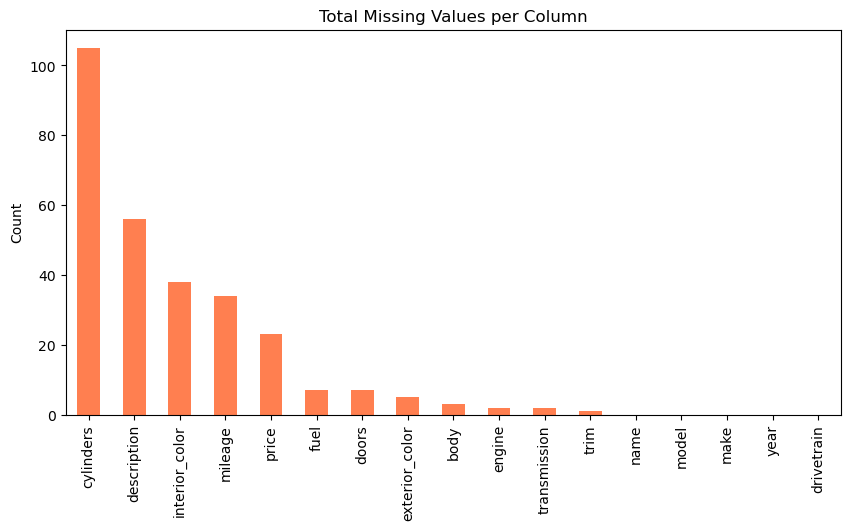

In [95]:
df.isnull().sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 5), color='coral'
)
plt.title('Total Missing Values per Column')
plt.ylabel('Count')
plt.show()

In [96]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [97]:
df.shape

(1002, 17)

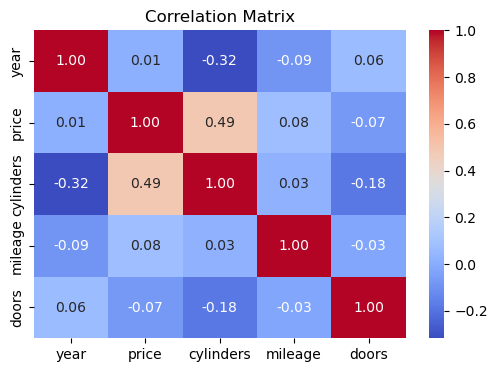

In [73]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [99]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical

['name',
 'description',
 'make',
 'model',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

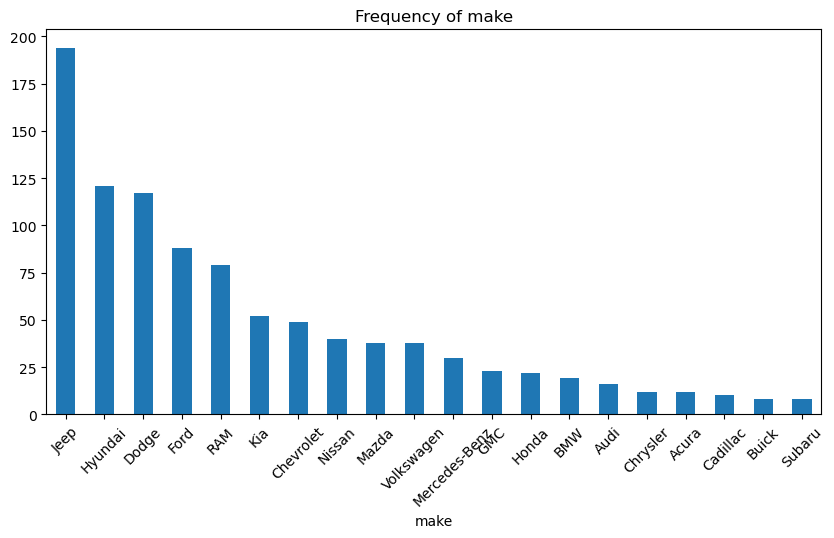

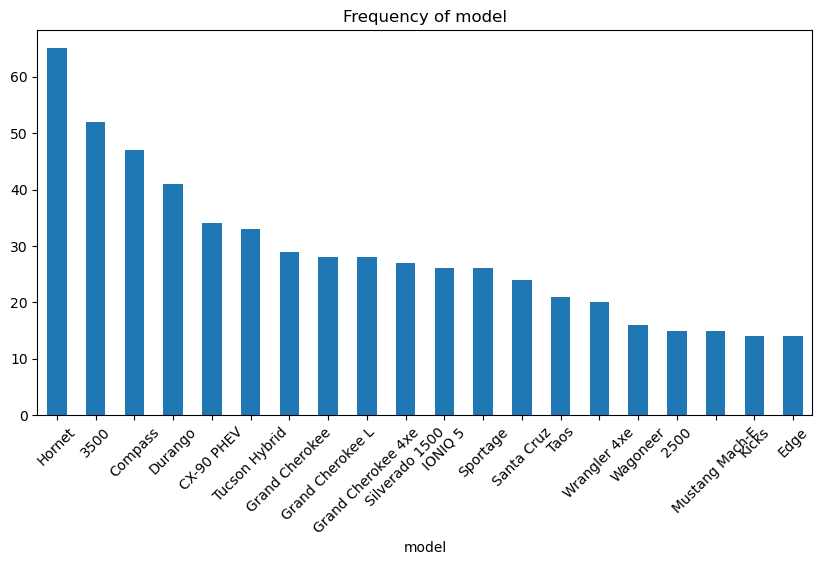

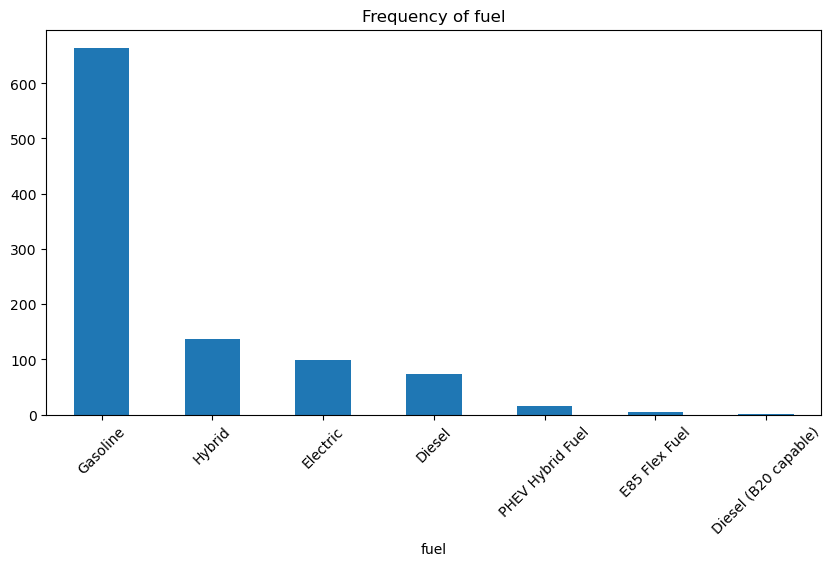

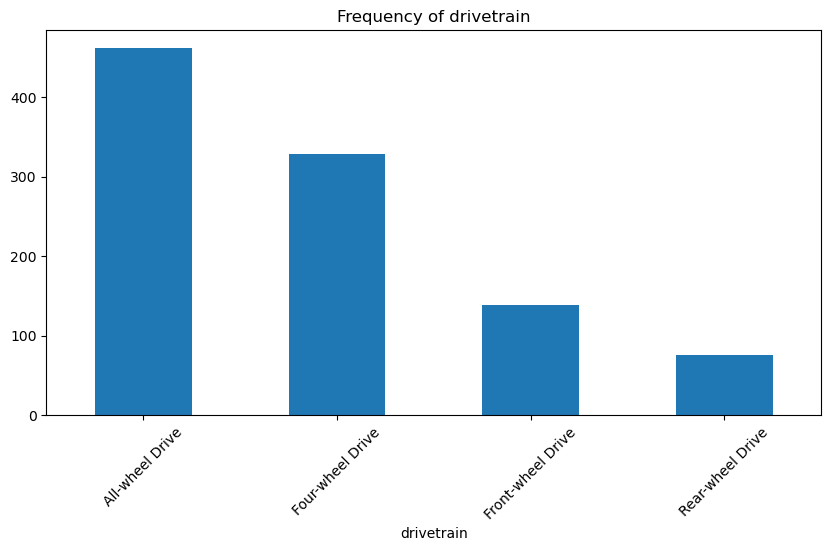

In [ ]:
categorical = ['make', 'model', 'fuel', 'drivetrain']
for col in categorical:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(20).plot(kind='bar')  
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

X.shape, y.shape


((1002, 16), (1002,))

In [11]:
y.isnull().sum()

np.int64(23)

In [12]:
# Impute missing values in target column
target_imputer = SimpleImputer(strategy='mean')
y = target_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()


In [13]:
print("Missing values in y:", np.isnan(y).sum())  # Should be 0

Missing values in y: 0


In [14]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols

['year', 'cylinders', 'mileage', 'doors']

In [15]:
categorical_cols

['name',
 'description',
 'make',
 'model',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [16]:
df[numerical_cols].head()

,year,cylinders,mileage,doors
0,2024,6.0,10.0,4.0
1,2024,6.0,1.0,4.0
2,2024,8.0,0.0,4.0
3,2023,8.0,32.0,4.0
4,2024,6.0,10.0,4.0


In [17]:
df[categorical_cols].head()

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,24V GDI DOHC Twin Turbo,Gasoline,8-Speed Automatic,Series II,SUV,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,OHV,Gasoline,8-Speed Automatic,Laredo,SUV,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,"6.2L V-8 gasoline direct injection, variable v...",Gasoline,Automatic,Denali,SUV,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,16V MPFI OHV,Gasoline,8-Speed Automatic,Pursuit,SUV,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,24V DDI OHV Turbo Diesel,Diesel,6-Speed Automatic,Laramie,Pickup Truck,Silver,Black,Four-wheel Drive


In [75]:
df[categorical_cols].isnull().sum().sort_values(ascending=False)


description       56
interior_color    38
fuel               7
exterior_color     5
body               3
engine             2
transmission       2
trim               1
model              0
make               0
name               0
drivetrain         0
dtype: int64

In [19]:
df[numerical_cols].isnull().sum().sort_values(ascending=False)

cylinders    105
mileage       34
doors          7
year           0
dtype: int64

In [20]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [21]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [22]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['year', 'cylinders', 'mileage', 'doors']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['name', 'description', 'make', 'model',
                                  'engine', 'fuel', 'transmission', 'trim',
                                  'body', 'exterior_color', 'interior_color',
                                  'drivetrain'])])

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline.predict(X_test)

lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['name', 'description',
                                                   'make', 'model', 'engine',
                                                   'fuel', 'transmission',
                                                   'trim', 'body',
                                                   'exterior_color',
                                                   'interior_color',
                                                   'drivetrain'])])),
                ('model', LinearRegression())])

In [29]:
def evaluate_regression_model(y_test, y_preds, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    
    print(f"📊 Evaluation Metrics for {model_name}:")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE : {mae:.4f}")
    print(f"✅ R²  : {r2:.4f}")
    
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

In [38]:
metrics = evaluate_regression_model(y_test, y_preds, model_name="lr_pipeline")

📊 Evaluation Metrics for lr_pipeline:
✅ RMSE: 6430.6043
✅ MAE : 3721.2296
✅ R²  : 0.8378


In [64]:
# Decision Tree Regressor
dtr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(random_state=42))])
dtr_pipeline.fit(X_train, y_train)
dtr_preds = dtr_pipeline.predict(X_test)

dtr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['name', 'description',
                                                   'make', 'model', 'engine',
                                                   'fuel', 'transmission',
                                                   'trim', 'body',
                                                   'exterior_color',
                                                   'interior_color',
                                                   'drivetrain'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [47]:
metrics = evaluate_regression_model(y_test, dtr_preds, model_name="DecisionTreeRegressor")

📊 Evaluation Metrics for DecisionTreeRegressor:
✅ RMSE: 6430.6043
✅ MAE : 3721.2296
✅ R²  : 0.8378


In [ ]:
# Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

In [49]:
metrics = evaluate_regression_model(y_test, rf_preds, model_name="RandomForestRegressor")

📊 Evaluation Metrics for RandomForestRegressor:
✅ RMSE: 6824.3771
✅ MAE : 3949.7877
✅ R²  : 0.8173


In [ ]:
from sklearn.linear_model import RidgeCV

# Ridge CV 
rdcv_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RidgeCV(alphas=(0.1, 1.0, 10.)))])
rdcv_pipeline.fit(X_train, y_train)
rdcv_preds = rdcv_pipeline.predict(X_test)


In [54]:
metrics = evaluate_regression_model(y_test, rdcv_preds, model_name="RidgeCV")

📊 Evaluation Metrics for RidgeCV:
✅ RMSE: 5389.5339
✅ MAE : 3682.8049
✅ R²  : 0.8861
